In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df=pd.read_csv('C:/Users/MERINA ANGEL/Downloads/Dry_Bean.csv') #reading csv file

In [3]:
df.head() #printing 5 rows

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df.shape #rows and columns of df

(13611, 17)

In [5]:
df.info() #information regarding df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
df.isnull().sum() #checking null values

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
df['Class'].value_counts() #checking unique values of class column

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [8]:
df.describe() #description regarding the numerical columns

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [9]:
df.corr() #checking the relation between the independent features

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


# plotting the graphs for visualization

<AxesSubplot:>

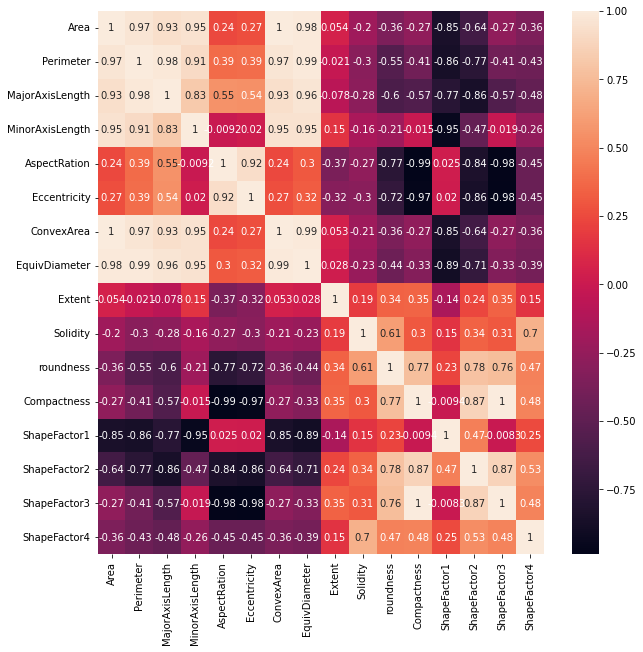

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(),annot=True) #visualizing the correlation

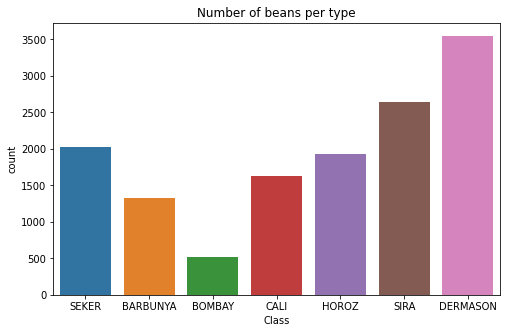

In [11]:
#countplot
plt.figure(figsize = (8, 5))
sns.countplot(x = df["Class"])
plt.title("Number of beans per type")
plt.show()


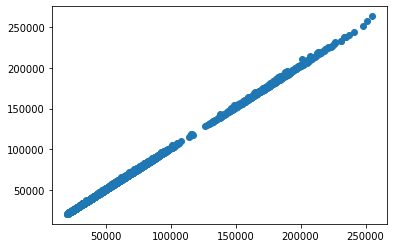

In [12]:
#scatterplot
plt.scatter(x='Area',y='ConvexArea',data=df)

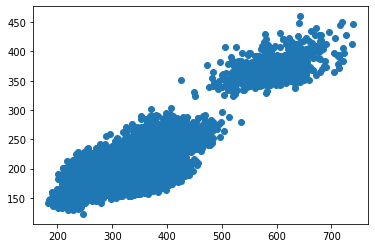

In [13]:
plt.scatter(x='MajorAxisLength',y='MinorAxisLength',data=df)

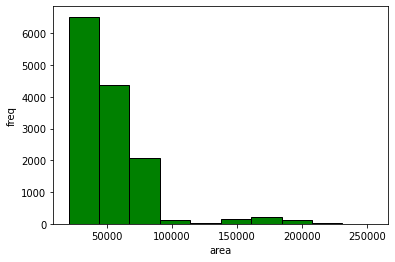

In [14]:
#histplot
plt.hist(df['Area'],10,histtype='bar',edgecolor='black',color='g')
plt.xlabel('area')
plt.ylabel('freq')
plt.show()

C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

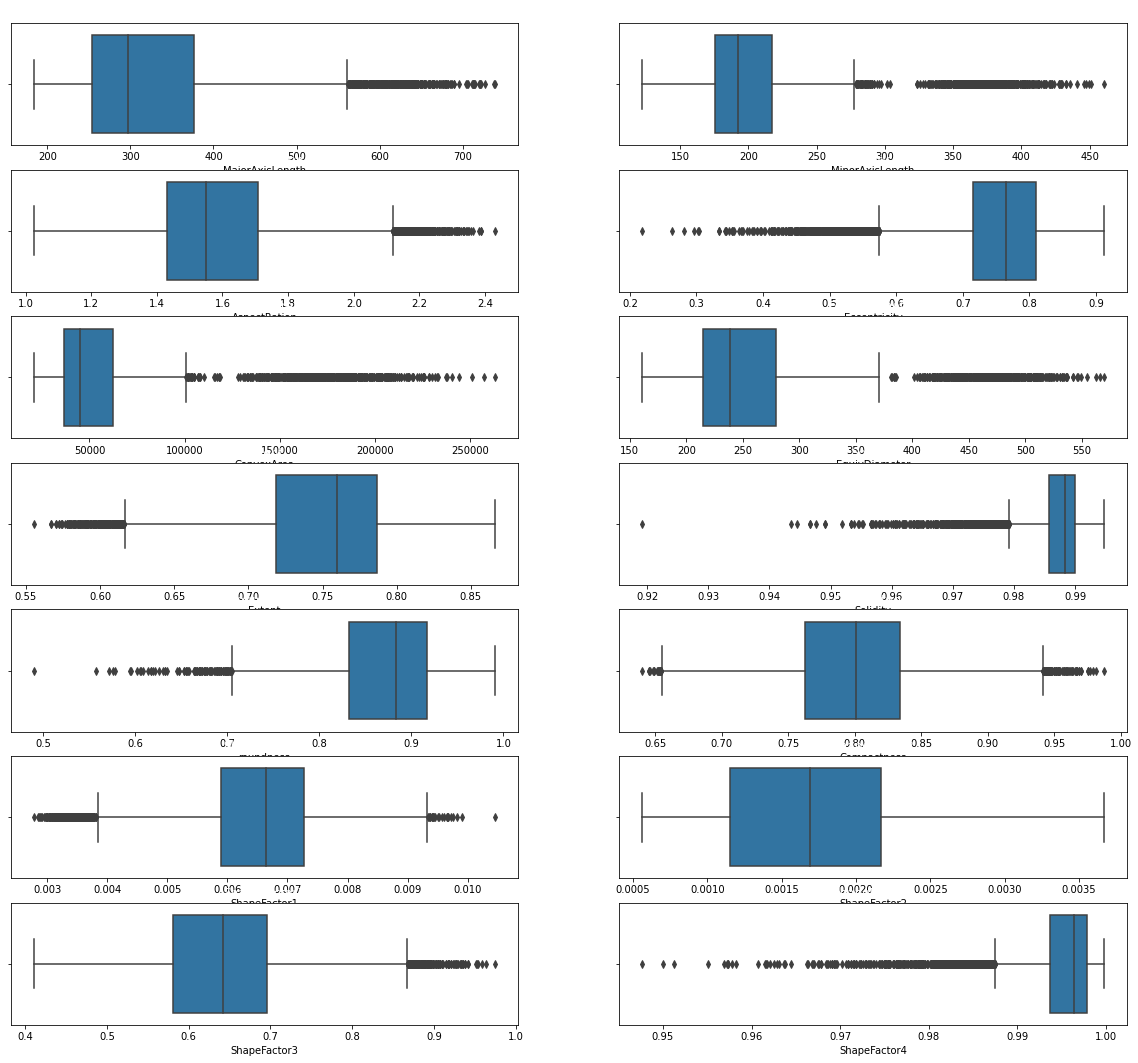

In [15]:
#checking outliers of all independent columns
j=1
plt.figure(figsize=(20,40))
col = ['MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']
for i in col:
    plt.subplot(len(col)+1,2,j)
    sns.boxplot(df[i])
    plt.title(i,color='white')
    j=j+1

##### By this(using box plot) we can conclude that mostly each independent feature has outliers and we need to clean them using EDA process

# explorartory data analysis 
mainly used for data cleaning and handling of outliers,imbalance data

In [ ]:
#has we can see the outliers but it seems like distribution of data. so i have used the log transformation to reduce the skewness

In [16]:
x=df.drop('Class',axis=1)
y=df['Class']

In [17]:
x.skew()

Area               2.952931
Perimeter          1.626124
MajorAxisLength    1.357815
MinorAxisLength    2.238211
AspectRation       0.582573
Eccentricity      -1.062824
ConvexArea         2.941821
EquivDiameter      1.948958
Extent            -0.895348
Solidity          -2.550093
roundness         -0.635749
Compactness        0.037115
ShapeFactor1      -0.534141
ShapeFactor2       0.301226
ShapeFactor3       0.242481
ShapeFactor4      -2.759483
dtype: float64

In [18]:
l1=[]
for i in x.columns:
    data_log = np.log(x[i])
    X1= pd.DataFrame(data_log)
    X2= X1.transpose()
    l1.append(X2)
df = pd.DataFrame(np.concatenate(l1))

X=df.transpose()
X.columns=x.columns
    


In [19]:
X.skew()

Area               1.071374
Perimeter          0.842886
MajorAxisLength    0.629485
MinorAxisLength    1.308713
AspectRation       0.175051
Eccentricity      -1.630537
ConvexArea         1.066049
EquivDiameter      1.071374
Extent            -1.094230
Solidity          -2.611098
roundness         -0.876845
Compactness       -0.167905
ShapeFactor1      -1.310746
ShapeFactor2      -0.218269
ShapeFactor3      -0.167905
ShapeFactor4      -2.809663
dtype: float64

C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

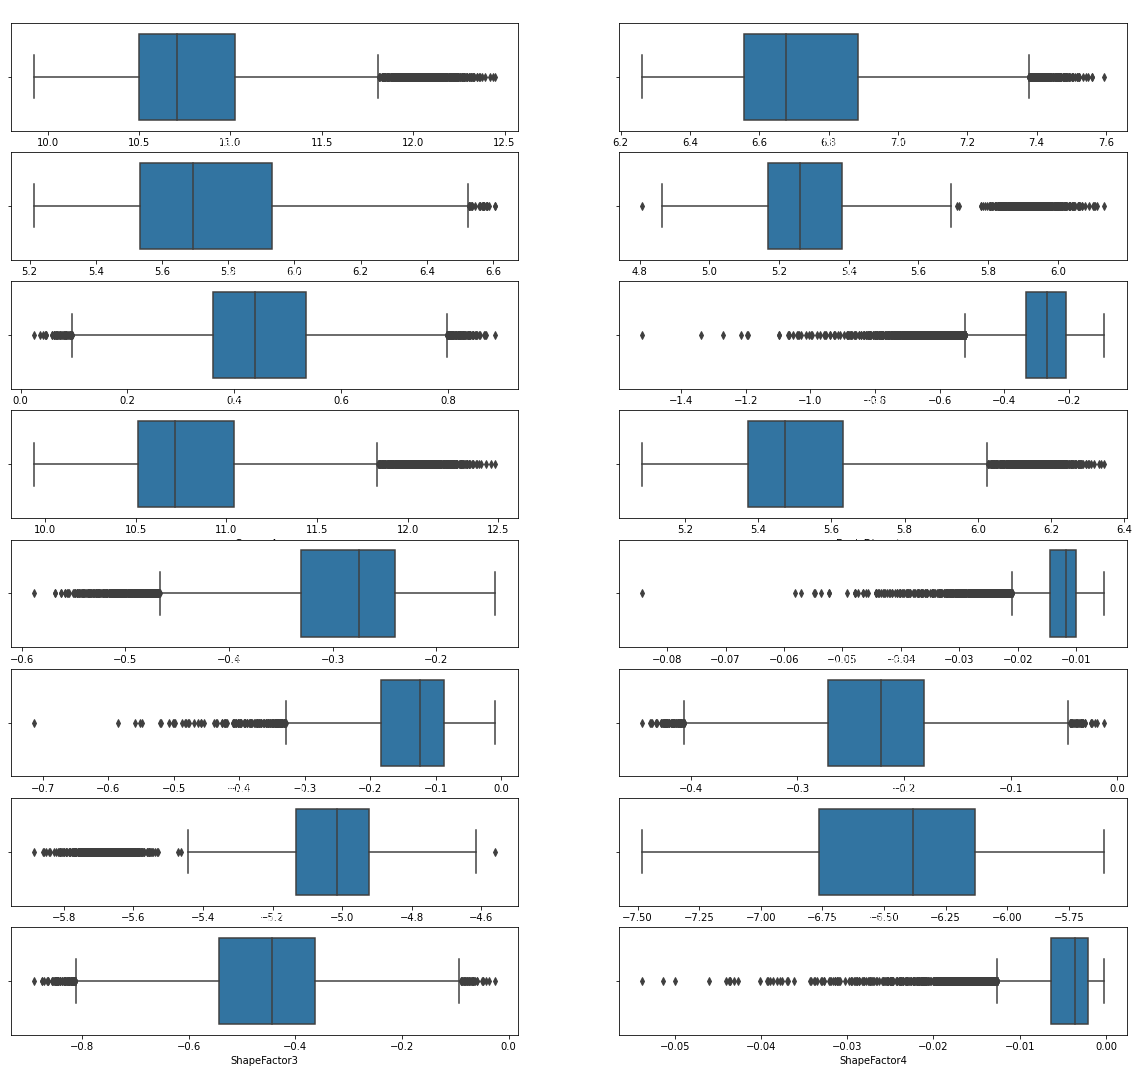

In [20]:
#checking outliers of all independent columns
j=1
plt.figure(figsize=(20,40))
col = ['MajorAxisLength','MinorAxisLength','AspectRation','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','roundness','Compactness','ShapeFactor1','ShapeFactor2','ShapeFactor3','ShapeFactor4']
for i in X.columns:
    plt.subplot(len(X.columns)+1,2,j)
    sns.boxplot(X[i])
    plt.title(i,color='white')
    j=j+1

# label encoding
it is to encode the categorical data into numerical data

In [21]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y= label_encoder.fit_transform(y)



In [22]:
pd.DataFrame(y).value_counts() #unique values of y

3    3546
6    2636
5    2027
4    1928
2    1630
0    1322
1     522
dtype: int64

# handling of imbalance data

In [23]:
from imblearn.combine import SMOTEENN #smoteenn is the combination of under and over sampling method 
sme = SMOTEENN()
x_sme, y_sme = sme.fit_resample(X, y)
#handling the imbalance data using smoteenn

# train_test_Split

In [24]:
 from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sme,y_sme,test_size=0.3)
#spiltiing the data into train and test data

# feature selection

In [25]:
from sklearn.preprocessing import StandardScaler
#using standard scaler to standardize the data

In [26]:
scaler = StandardScaler() #assigning the standardscaler to scaler

In [27]:
scaler.fit_transform(x_train,y_train) #fitting and transforming the training data using standardscaler

array([[ 1.69481688,  1.604595  ,  1.48349132, ..., -1.04281787,
         0.16797825,  0.31712799],
       [ 0.39048934,  0.40525992,  0.4846035 , ..., -0.56048709,
        -0.50439301, -2.19546632],
       [-0.1498985 ,  0.03636027,  0.39102599, ..., -1.07880945,
        -2.00095531,  0.44801739],
       ...,
       [-0.20561727, -0.10338619,  0.24461991, ..., -0.82559134,
        -1.63516431,  0.57843524],
       [-0.68228075, -0.8030692 , -1.00473375, ...,  1.3336299 ,
         1.48223291,  0.90706102],
       [-0.99780934, -1.11018103, -1.26235201, ...,  1.48613924,
         1.38034703,  1.01265696]])

In [28]:
scaler.transform(x_test) #transforming the testing data using standardscaler

array([[-0.68722672, -0.49379417, -0.85014062, ...,  0.98031027,
         0.87734763,  0.64729676],
       [ 1.57763486,  1.51676935,  1.31746885, ..., -0.82843238,
         0.39767645,  0.03395089],
       [ 1.91179114,  1.86149795,  1.67158068, ..., -1.17221581,
         0.19644487, -1.68186215],
       ...,
       [-1.16596574, -1.18684139, -1.15830594, ...,  1.02624348,
         0.40821232, -0.37334779],
       [-0.39019098, -0.43161676, -0.40697945, ...,  0.38682728,
         0.21020506,  0.24419892],
       [ 1.48244437,  1.35900417,  1.1969561 , ..., -0.68646399,
         0.52968423, -1.10027226]])

# building the ml models

# logistic regression

In [29]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
#fitting the trainind set into logistic regression
classifier.fit(x_train,y_train)
y_pred= classifier.predict(x_test) #prediction of test data

C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [31]:
cm=confusion_matrix(y_test,y_pred)
print(cm) 
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)#accuracy

[[ 904    7   32    0    2   15   16]
 [   0 1008   31    0    0    1    0]
 [  11   14  919    0   12    0   30]
 [   8    0    0  795    2   10   26]
 [   3    0   17    0  931    0    6]
 [  10    0    0    4    0  951    3]
 [  17    0   61   64    5    6  667]]
0.9373102610807529


In [32]:
y_pred= classifier.predict(x_train)
accuracy=accuracy_score(y_train,y_pred)
accuracy

0.9387848035389019

# knn

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred= knn.predict(x_test)

In [34]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

[[ 962    0   12    0    0    1    1]
 [   0 1040    0    0    0    0    0]
 [   6    0  979    0    0    0    1]
 [   0    0    0  829    0    1   11]
 [   0    0    2    0  954    0    1]
 [   0    0    0    2    0  963    3]
 [   3    0    2    4    0    1  810]]
0.9922586520947176


In [35]:
err_rate=[]

for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)#kvalue
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    err_rate.append(np.mean(y_pred != y_test))#it helps to set the k value

Text(0, 0.5, 'ER')

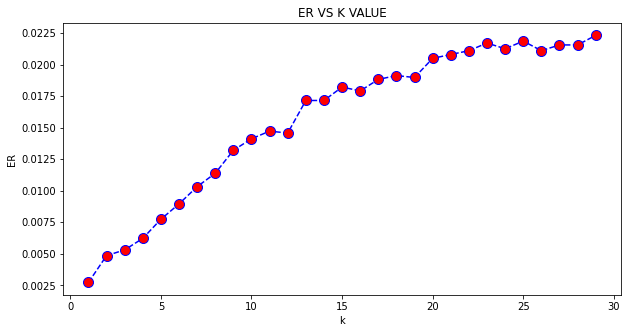

In [36]:
#plotting the graph of er vs k
plt.figure(figsize=(10,5))
plt.plot(range(1,30),err_rate,color='Blue',linestyle='dashed',marker='o',
        markerfacecolor='red',markersize=10)
plt.title('ER VS K VALUE')  #where er is less we select it as k value
plt.xlabel('k')
plt.ylabel('ER')   

In [37]:
#train data accuracy
y_pred= knn.predict(x_train)
accuracy=accuracy_score(y_train,y_pred)
accuracy

0.9793780900338277

# decision tree classifier

In [38]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
a=DecisionTreeClassifier()
a.fit(x_train,y_train)
y_pred=a.predict(x_test)

In [39]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

[[ 951    0   21    0    0    1    3]
 [   0 1039    1    0    0    0    0]
 [  17    1  962    0    5    0    1]
 [   0    0    0  831    0    1    9]
 [   2    0    0    1  953    0    1]
 [   1    0    0    3    0  962    2]
 [   5    0    4   11    2    6  792]]
0.9851244687310261


In [40]:
#train data accuracy
y_pred= a.predict(x_train)
accuracy=accuracy_score(y_train,y_pred)
accuracy

1.0

# naive bayes classifier

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
naive=GaussianNB()

In [43]:
naive.fit(x_train,y_train) #fitting training dataset

GaussianNB()

In [44]:
y_pred=naive.predict(x_test)

In [45]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

[[ 873    0   80    0    2    3   18]
 [   1 1039    0    0    0    0    0]
 [  66    1  916    0    2    0    1]
 [   0    0    0  815    0    5   21]
 [   0    0    4    4  949    0    0]
 [   4    0    0    0    0  954   10]
 [   5    0    0    7   11    4  793]]
0.9622040072859745


In [46]:
#train data accuracy
y_pred= naive.predict(x_train)
accuracy=accuracy_score(y_train,y_pred)
accuracy

0.9609029404111371

# random forest classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train) #fitting training dataset
y_pred=rf.predict(x_test) #prediction of x_test

In [48]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

[[ 968    0    7    0    0    1    0]
 [   1 1039    0    0    0    0    0]
 [   1    0  984    0    0    0    1]
 [   0    0    0  834    0    2    5]
 [   0    0    0    0  957    0    0]
 [   1    0    0    1    0  964    2]
 [   5    0    1    9    2    1  802]]
0.9939283545840923


In [49]:
#train data accuracy
y_pred= rf.predict(x_train)
accuracy=accuracy_score(y_train,y_pred)
accuracy

1.0

# svc

from sklearn.svm import SVC
svc=SVC() 
svc.fit(x_train,y_train)
preds = svc.predict(x_test)
accuracy_score(y_test, preds)


#svc is taking longer time for processing

## lr=75
## knn=94
## dt=98
## naive=87
## rf=98

### plotting the graph for test and train accuracies of different models/algorithms

In [50]:
MLA = [rf,classifier,naive,knn,a]

In [51]:
#checking the train and test accuracy's differences
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(x_train, y_train).predict(x_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)


    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

C:\Users\MERINA ANGEL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,MLA Name,MLA Train Accuracy,MLA Test Accuracy
0,RandomForestClassifier,1.0000,0.9944
4,DecisionTreeClassifier,1.0000,0.9854
3,KNeighborsClassifier,0.9794,0.9777
2,GaussianNB,0.9609,0.9622
1,LogisticRegression,0.9388,0.9373


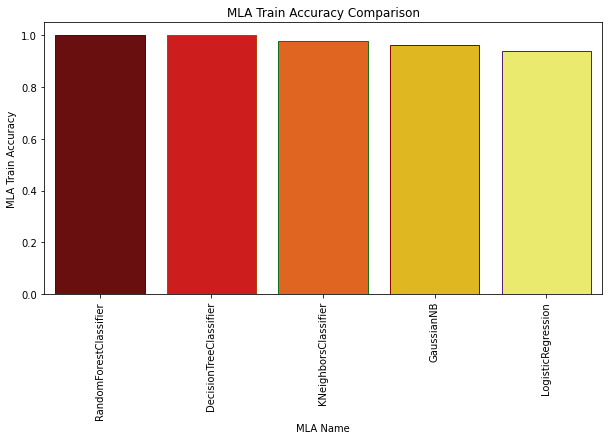

In [52]:
#train accuracy of different models
plt.subplots(figsize=(10,5))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

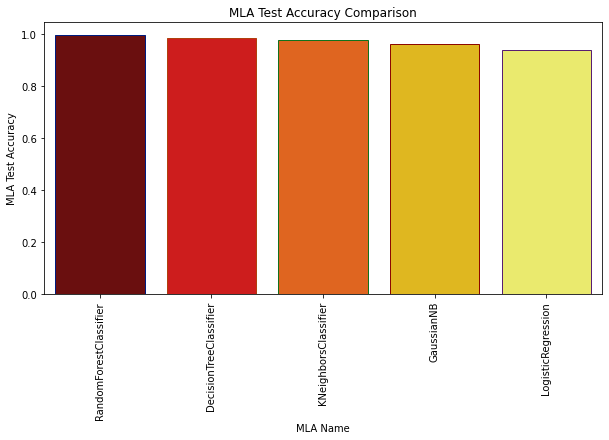

In [53]:
#test accuracy of different models
plt.subplots(figsize=(10,5))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

In [54]:
y_pred_rf= rf.predict(x_train)

y_pred_a= a.predict(x_train)

y_pred_knn= knn.predict(x_train)

y_pred_classifier= classifier.predict(x_train)

y_pred_naive=naive.predict(x_train)


In [55]:
y_train

array([1, 2, 4, ..., 4, 5, 5])

In [56]:
y_test

array([5, 1, 1, ..., 3, 6, 1])

In [57]:
y

array([5, 5, 5, ..., 3, 3, 3])

In [58]:

y_pred_rf1= rf.predict(x_test)

y_pred_a1= a.predict(x_test)

y_pred_knn1= knn.predict(x_test)

y_pred_classifier1= classifier.predict(x_test)

y_pred_naive1=naive.predict(x_test)

Text(0.5, 1.0, 'train vs test rf')

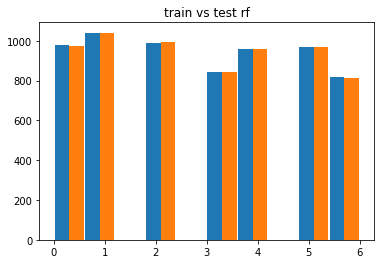

In [59]:
plt.hist([y_test,y_pred_rf1],rwidth=0.95 )
plt.title('train vs test rf')

Text(0.5, 1.0, 'train vs test dt')

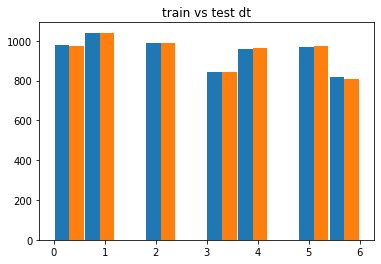

In [60]:
plt.hist([y_test,y_pred_a1],rwidth=0.95 )
plt.title('train vs test dt')

Text(0.5, 1.0, 'train vs test dt')

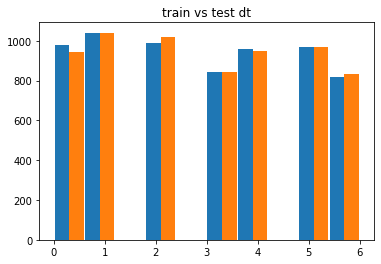

In [61]:
plt.hist([y_test,y_pred_knn1],rwidth=0.95 )
plt.title('train vs test dt')

Text(0.5, 1.0, 'train vs test dt')

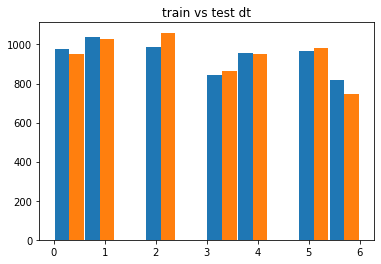

In [62]:
plt.hist([y_test,y_pred_classifier1],rwidth=0.95 )
plt.title('train vs test dt')

Text(0.5, 1.0, 'train vs test naive')

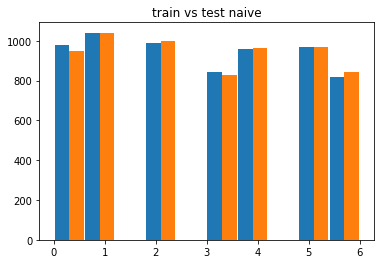

In [63]:
plt.hist([y_test,y_pred_naive1],rwidth=0.95 )
plt.title('train vs test naive')